In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

### Since late April, I have been training for the Marine Corps Marathon, my first Marathon.  I started tracking my weight and running consistently in mid-May and wanted to visualize my progress using key dimensions from my weeks of training.  I decided to use a recent 20k race as the endpoint for this analysis.  At the 20k, I ran a 10:00 pace with the last four miles at a 9:45, 9:30, 9:15, and 8:45 pace, faster than I thought.

### During late May, I pulled my calf muscle and had to limit my running.  To ensure I did not lose fitness, I swam on long run days.  

### To lose wieght, I focused on eating less processed foods, drinking less beer, and eating more lean meats and vegetables.

### To build my training plan, I used Hal Higdon's Novice 2 as a baseline.  (https://www.halhigdon.com/training-programs/half-marathon-training/novice-2-half-marathon/)


## Get and Format Weight Data

In [33]:
weight = pd.read_csv('weight.csv', parse_dates = ['Start', 'Finish'],
                     dtype={'Start': 'str', 'Finish': 'str', "Weight (lb)":'float'})
weight.drop('Finish', axis=1, inplace=True)
weight.rename(columns={'Start': 'day','Weight (lb)':'weight'}, inplace=True)
weight['day'] = weight['day'].map(lambda x: x.date())

In [34]:
weight_df = weight[weight['weight']>0]

In [35]:
weight_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 92
Data columns (total 2 columns):
day       27 non-null object
weight    27 non-null float64
dtypes: float64(1), object(1)
memory usage: 648.0+ bytes


In [36]:
weight_df.head()

,day,weight
0,2018-05-15,256.2
4,2018-05-19,252.0
8,2018-05-23,254.0
9,2018-05-24,249.0
14,2018-05-29,251.0


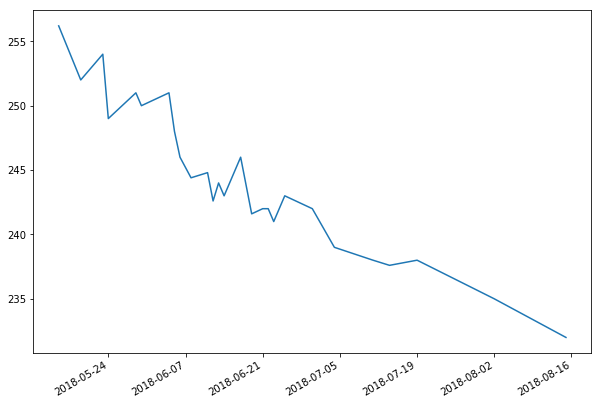

In [37]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(weight_df['day'], weight_df['weight'])
fig.autofmt_xdate()
plt.show()

## Get and Format Swim Data

In [38]:
swim = pd.read_csv('swim.csv', parse_dates=['day'])
swim['day'] = swim['day'].map(lambda x: x.date())
swim.set_index('day', inplace=True)
swim['swim_time'] = swim['time']
swim['swim_dist'] = swim['distance']
swim = swim[['swim_dist','swim_time']]
swim.head()

,swim_dist,swim_time
day,,
2018-05-19,2200.0,68.0
2018-05-22,1800.0,58.0
2018-05-26,2250.0,60.0
2018-06-03,1600.0,51.0
2018-06-10,2500.0,71.0


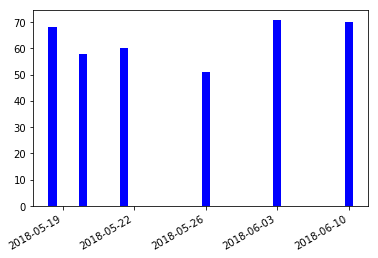

In [39]:
fig, ax = plt.subplots()
ax.set_xticklabels(swim.index)
ax.bar(swim.index, swim['swim_time'], color='blue')

fig.autofmt_xdate()

## Get and Format Runs Data

In [40]:
runs_df = pd.read_csv('runs.csv', parse_dates = ['Day'])
runs_df = runs_df.rename(columns={'Day':'day', 'Mileage':'miles', 'Time':'time'})
runs_df['day'] = runs_df['day'].map(lambda x: x.date())
runs_df.set_index('day', inplace=True)

### My raw data consisted of time ran as a "HH:MM:SS" format.  I read it in as a string, then converted it to a pandas timedelta.  I was then able to determine the number of hours and mins spent running.  With those values, I was able to calculate the speed (miles per hour) and the pace (mins per mile) for each of my runs.

In [41]:
runs_df['time'] = runs_df['time'].map(lambda x: pd.to_timedelta(x, unit='h'))

runs_df['hours'] = runs_df['time'] / pd.Timedelta('1 hour')
runs_df['mins'] = runs_df['time'] / pd.Timedelta('1 min')

runs_df['mph'] = runs_df['miles'] / runs_df['hours']
runs_df['pace'] =runs_df['mins'] /runs_df['miles']

In [42]:
runs_df[runs_df['miles']>0]

,miles,time,heart rate,hours,mins,mph,pace
day,,,,,,,
2018-05-07,3.00,0 days 00:36:32,NaN,0.608889,36.533333,4.927007,12.177778
2018-05-08,5.00,0 days 00:55:40,NaN,0.927778,55.666667,5.389222,11.133333
2018-05-10,3.12,0 days 00:36:56,NaN,0.615556,36.933333,5.068592,11.837607
2018-05-12,7.07,0 days 01:27:23,NaN,1.456389,87.383333,4.854473,12.359736
2018-05-15,3.00,0 days 00:33:46,NaN,0.562778,33.766667,5.330701,11.255556
2018-05-16,4.54,0 days 00:52:11,NaN,0.869722,52.183333,5.220057,11.494126
2018-05-19,0.29,0 days 00:03:28,NaN,0.057778,3.466667,5.019231,11.954023
2018-05-20,3.34,0 days 00:41:28,NaN,0.691111,41.466667,4.832797,12.415170
2018-05-22,2.01,0 days 00:23:32,NaN,0.392222,23.533333,5.124646,11.708126


## Add Swims to Runs

In [43]:
activity = pd.merge(runs_df, swim, left_index=True, right_index=True, how='left')

## Make rolling Average for Running Pace

### I want to find a rolling average for pace to smooth out major differences between weekly runs and get a better repersentation of my pace over the long term.  What rolling window should I use?

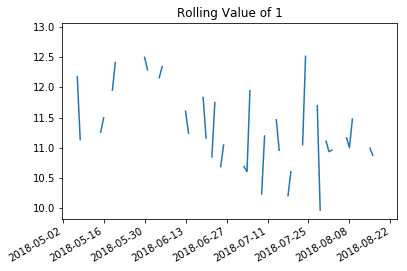

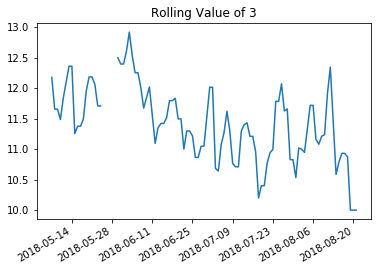

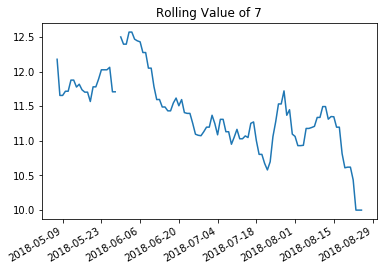

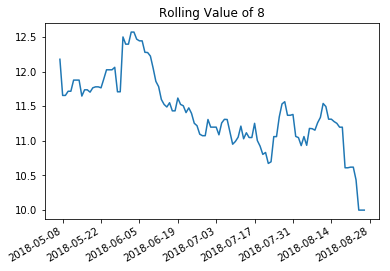

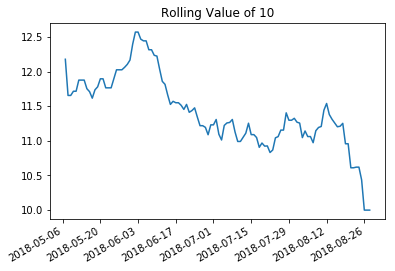

In [44]:
rolls = [1,3,7,8,10]
for x in rolls:
    fig, ax = plt.subplots()
    ax.plot(activity.index, activity['pace'].rolling(window=x, min_periods=1).mean())
    plt.title("Rolling Value of {}".format(x))
    fig.autofmt_xdate()
    plt.show()

### A rolling window of 8 prevents any breaks in the graph and presents a relatively smooth curve.

In [45]:
activity['rolling_pace_8'] = activity['pace'].rolling(window=8, min_periods=1).mean()

## Compare Swimming and Running During Injury By Time

### While injured in late May, I maintained fitness by swimming.  How can I compare my swimming time to my running?  A comparison between just time seems most complete, but then I would lose the ability to show "Miles Ran" in the final chart.

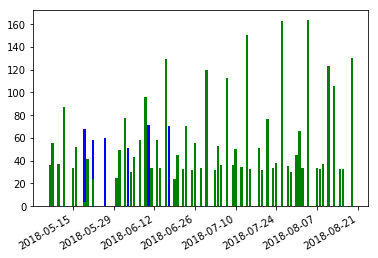

In [46]:
fig, ax = plt.subplots()

bar1 = ax.bar(activity.index, activity['swim_time'], color='blue')
bar2 = ax.bar(activity.index, activity['mins'], color='green')

fig.autofmt_xdate()

In [47]:
activity['swim_miles'] = activity['swim_time']/activity['rolling_pace_8']

### A plot of swim equivalent miles to run miles is consistent with plotting by time during each activity, but allows me to continue using miles ran as a dimension in the final chart.

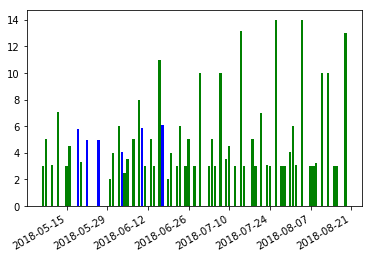

In [48]:
fig = plt.figure()
plt.style.use('default')

ax = fig.add_subplot(111)

bar1 = ax.bar(activity.index, activity['miles'], color='green', label='Miles Ran')
bar2 = ax.bar(activity.index, activity['swim_miles'], color='blue', label='Swim Miles Equivalent')

fig.autofmt_xdate()

## Make an Overview of Training Plan

### I now have all the data that I want to create a final visulization.  I decided to use Pace instead of Speed for several reasons.  I found Pace easier to read, and believed that the downward slope of Pace rather than the updward slope of Speed complemented the downward slope of Weight.  I considered separate spines for my three scales, but thought that it would look to busy.  Instead, I used colors to differntiate scales.

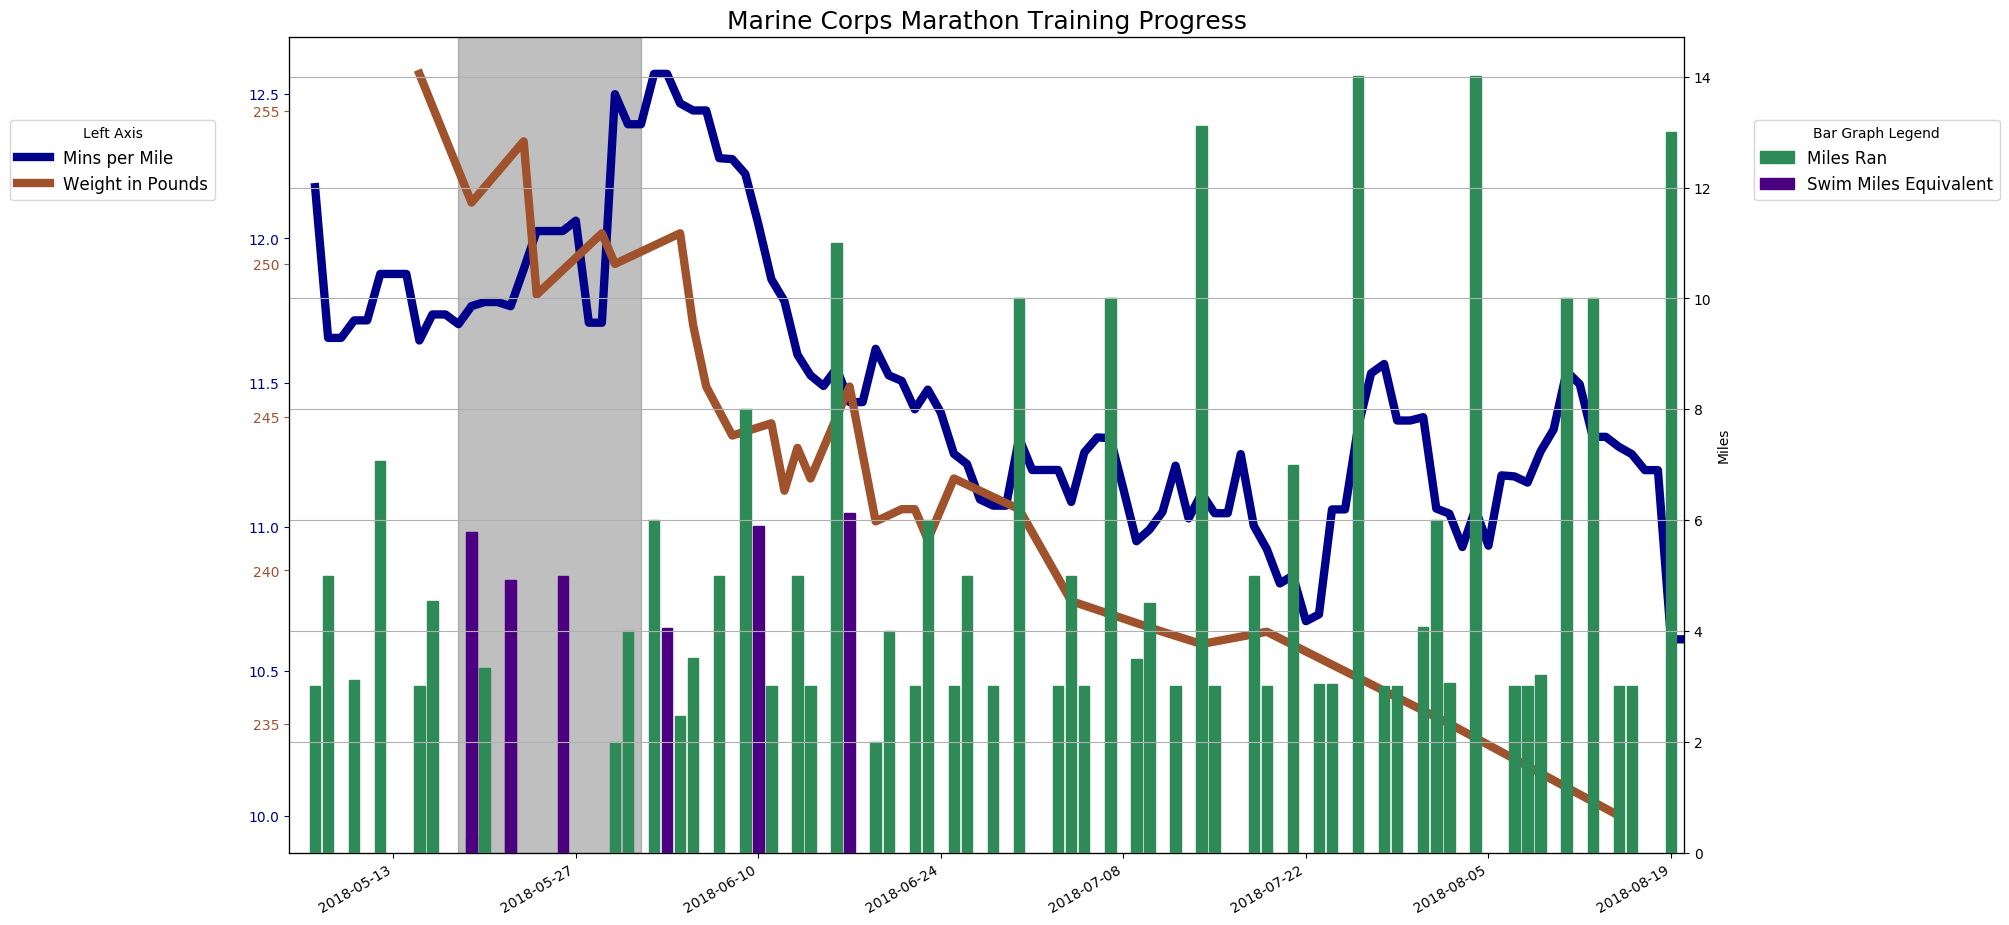

In [59]:
fig = plt.figure(figsize=(18,12))
plt.style.use('default')

ax = fig.add_subplot(111)

ax2 = ax.twinx()
ax3 = ax2.twinx()

# plot running pace from rolling average
lns1 = ax.plot(activity.index, activity['rolling_pace_8'], color='darkblue', linewidth=6, label='Mins per Mile')
ax.yaxis.label.set_color('darkblue')
ax.tick_params(axis='y', colors='darkblue')

# plot weight
lns2 = ax2.plot(weight_df['day'], weight_df['weight'], color='sienna', linewidth=6, label='Weight in Pounds')
ax2.yaxis.label.set_color('sienna')
ax2.tick_params(axis='y', colors='sienna')

# plot bar chart of miles ran
bar1 = ax3.bar(activity.index, activity['miles'], color='seagreen', edgecolor='seagreen', label='Miles Ran')
ax3.grid()

# plot bar chart of swim mile euivalent.  Since its on the same scale, we do not need a new axis.
bar2 = ax3.bar(activity.index, activity['swim_miles'], color='indigo', edgecolor='indigo', 
               label='Swim Miles Equivalent')

# shade injury period gray
ax.axvspan(pd.to_datetime('20180518', format='%Y%m%d'), 
           pd.to_datetime('20180601', format='%Y%m%d'), alpha=0.5, color='gray')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=(-.2,.8), title='Left Axis', fontsize=12)
ax3.legend(loc=(1.05,.8), title='Bar Graph Legend', fontsize=12)
ax3.set_ylabel('Miles')

plt.title('Marine Corps Marathon Training Progress', size=18)

# limit the data plotted to the training period
s_date = '20180505'
e_date = '20180820'
ax.set_xlim(left=pd.to_datetime(s_date, format='%Y%m%d'), right=pd.to_datetime(e_date, format='%Y%m%d'))
ax2.set_xlim(left=pd.to_datetime(s_date, format='%Y%m%d'), right=pd.to_datetime(e_date, format='%Y%m%d'))
ax3.set_xlim(left=pd.to_datetime(s_date, format='%Y%m%d'), right=pd.to_datetime(e_date, format='%Y%m%d'))

fig.autofmt_xdate()
plt.show()